In [607]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, combinations
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Single-Input Models

In [97]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=16),
    'RF': RandomForestClassifier(random_state=16),
    'LR': LogisticRegression(solver='saga', l1_ratio=0.5, random_state=16),
    'MLP': MLPClassifier(random_state=16)
}

In [98]:
parameters = {
    'KNN': {
        'n_neighbors': np.arange(1, 51, 1).tolist(),
        'weights': ['uniform', 'distance']
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': [0.01, 0.1, 1],
        'class_weight': [None, 'balanced']
    },
    'RF': {
        'n_estimators': np.arange(50, 201, 50).tolist(),
        'criterion': ['gini', 'entropy']
    },
    'LR': {
        'penalty': ['l2', 'l1', 'elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'MLP': {
        'hidden_layer_sizes': [(32,), (32, 16), (16,)],
        'solver': ['lbfgs', 'adam'],
        'activation': ['relu', 'tanh'],
        'alpha': [0.001, 0.01, 0.1, 1, 10]
    }
}

In [541]:
def model_train_eval(X, y):
    
    indep = X.name
    dep = y.name
    
    print("#####\nX:", indep, '| y:', dep, "\n#####")
    
    # UNCOMMENT FOR AUDIO FEATURES
    #X = StandardScaler().fit_transform(X.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16, stratify=y)
    
    results = []

    for model in models.keys():
        
        print('Training', model)
        
        clf = models[model]
        param = parameters[model]

        grid = GridSearchCV(clf, param, n_jobs=-1, verbose=2, scoring='f1_weighted')
        grid.fit(X_train, y_train)
        
        y_pred = grid.best_estimator_.predict(X_test)
        
        res = {
            'X': indep,
            'y': dep,
            'model': model,
            'params': grid.best_params_,
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'conf_matrix': ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greys', colorbar=False),
            'grid': grid
        }
        
        results.append(res)
        
    return results

In [100]:
labels = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/data.csv", index_col=0)[['mood', 'genre']]

## Vocals

In [101]:
vocals_full = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/vocals/vocals_full.csv", index_col=0)
vocals_30s = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/vocals/vocals_30s.csv", index_col=0)
vocals_10s = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/vocals/vocals_10s.csv", index_col=0)

In [102]:
vocals_full.name = "vocals_full"
vocals_30s.name = "vocals_30s"
vocals_10s.name = "vocals_10s"

In [103]:
vocals = [vocals_full, vocals_30s, vocals_10s]

#####
X: vocals_full | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_full | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_30s | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_30s | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_10s | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#####
X: vocals_10s | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


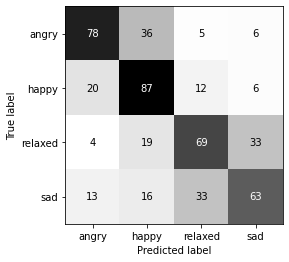

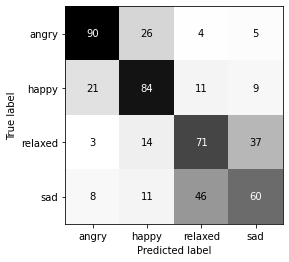

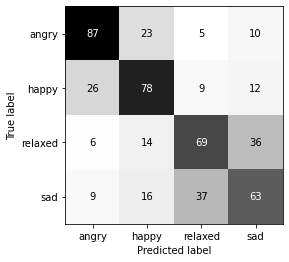

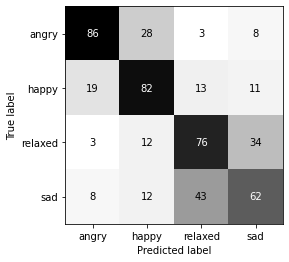

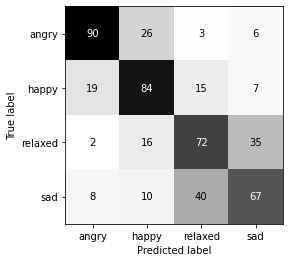

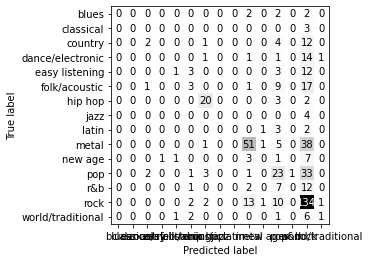

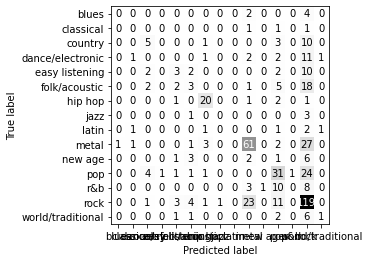

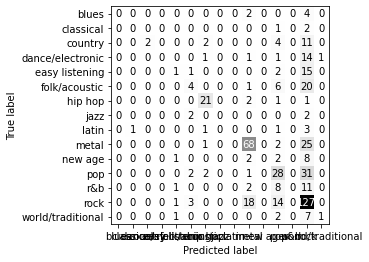

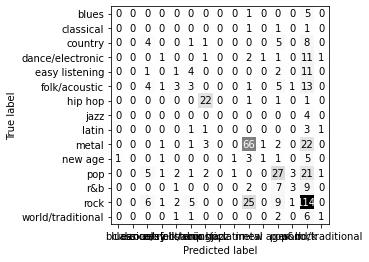

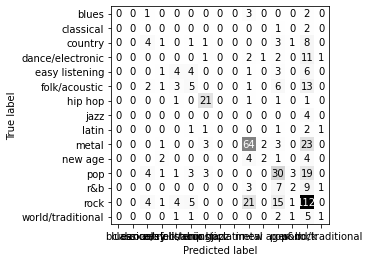

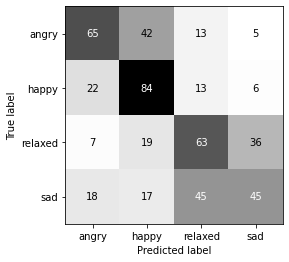

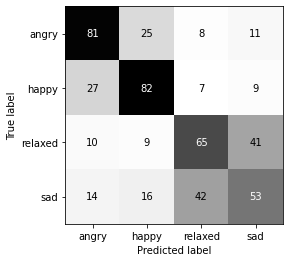

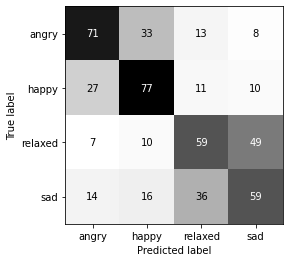

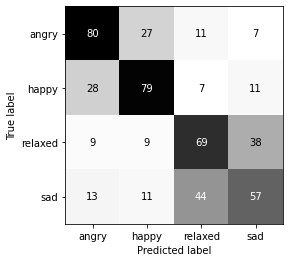

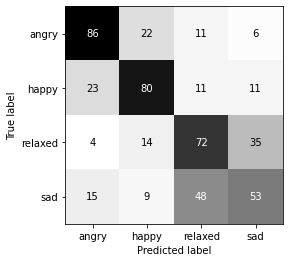

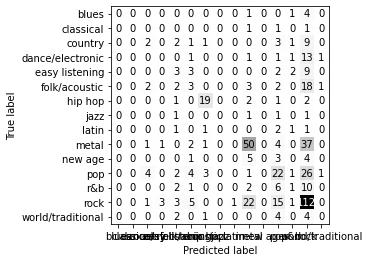

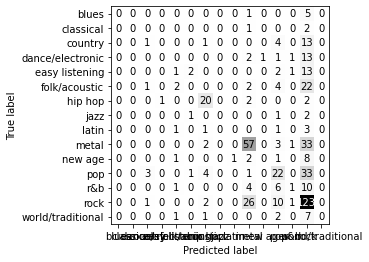

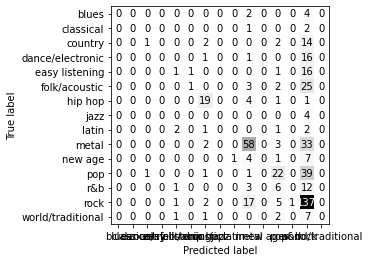

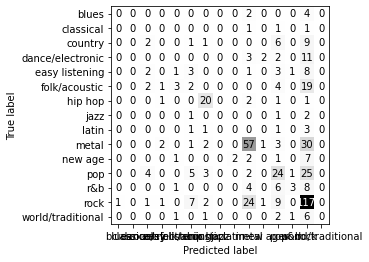

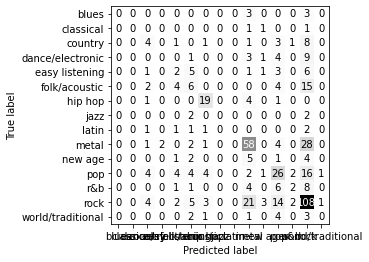

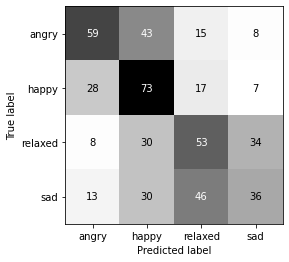

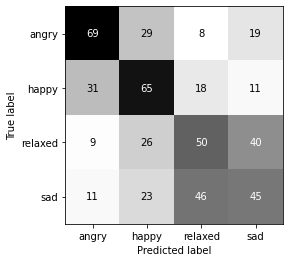

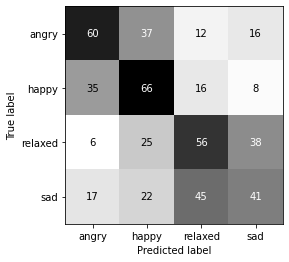

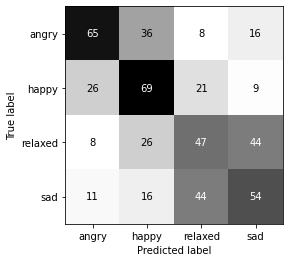

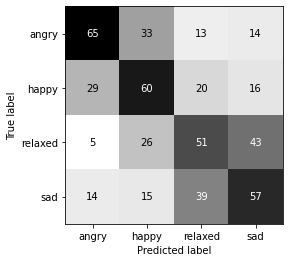

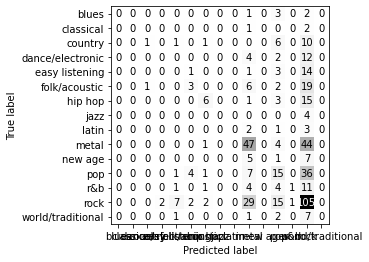

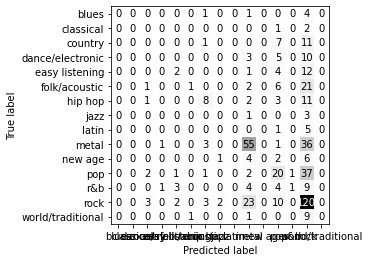

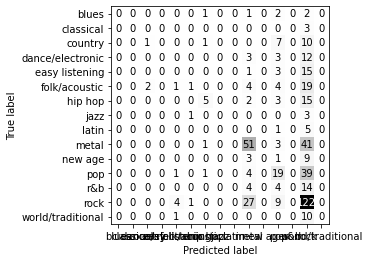

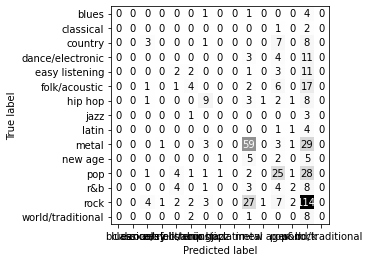

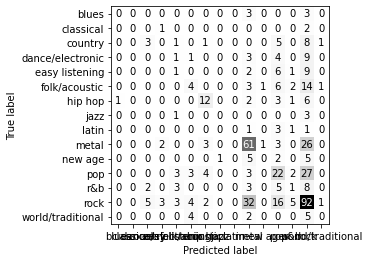

In [104]:
vocals_results = []

for X in vocals:
    for y in [labels['mood'], labels['genre']]:
        vocals_results.append(model_train_eval(X, y))

In [278]:
vocals_results = list(chain.from_iterable(vocals_results))

In [281]:
vocals_results_mood = []
vocals_results_genre = []

for res in vocals_results:
    if res['y'] == 'mood':
        vocals_results_mood.append(res)
    else:
        vocals_results_genre.append(res)

In [292]:
vocals_results_mood = pd.DataFrame(vocals_results_mood)
vocals_results_mood.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

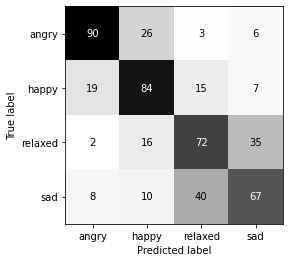

In [316]:
vocals_results_mood.loc[4, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.show()

In [293]:
vocals_results_genre = pd.DataFrame(vocals_results_genre)
vocals_results_genre.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

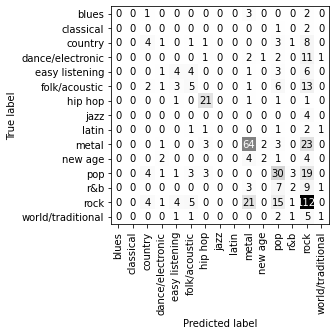

In [604]:
vocals_results_genre.loc[4, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.xticks(rotation=90)
plt.show()

## Music

In [105]:
music_full = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/music/music_full.csv", index_col=0)
music_30s = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/music/music_30s.csv", index_col=0)
music_10s = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/music/music_10s.csv", index_col=0)

In [106]:
music_full.name = "music_full"
music_30s.name = "music_30s"
music_10s.name = "music_10s"

In [107]:
music = [music_full, music_30s, music_10s]

#####
X: music_full | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: music_full | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#####
X: music_30s | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits
#####
X: music_30s | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: music_10s | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: music_10s | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


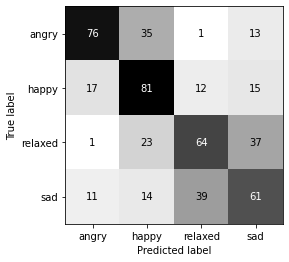

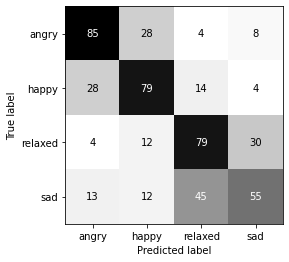

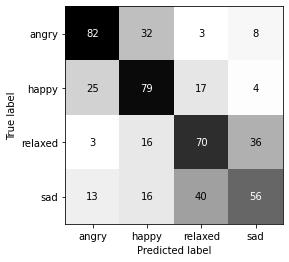

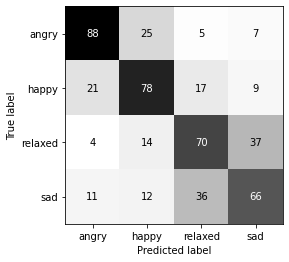

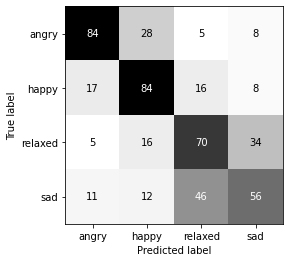

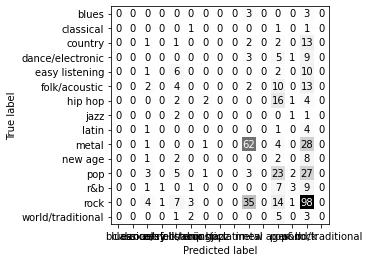

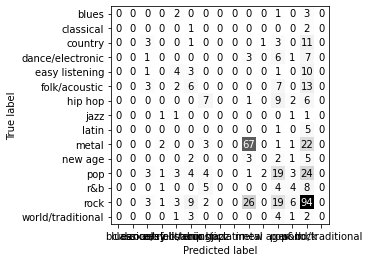

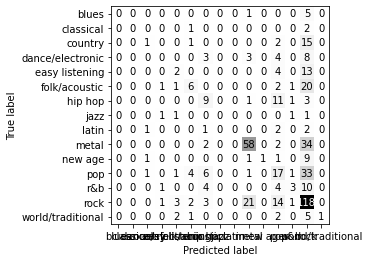

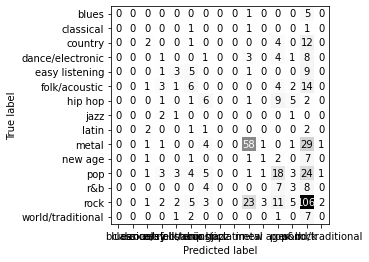

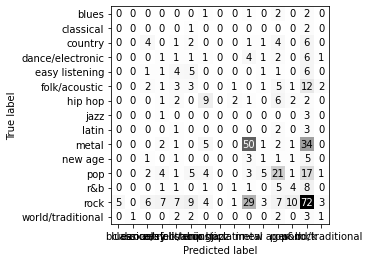

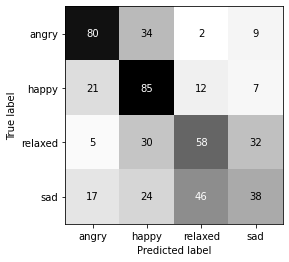

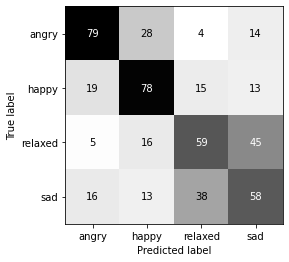

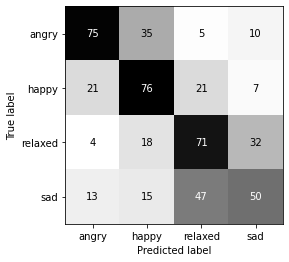

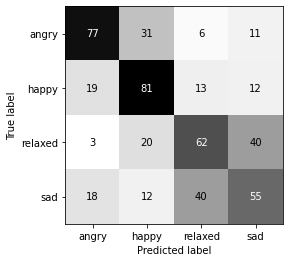

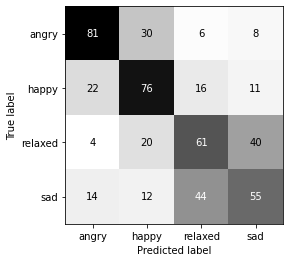

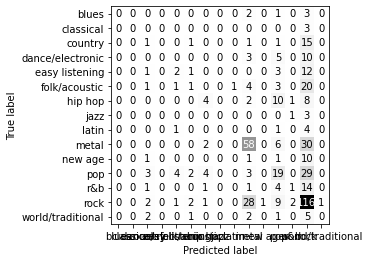

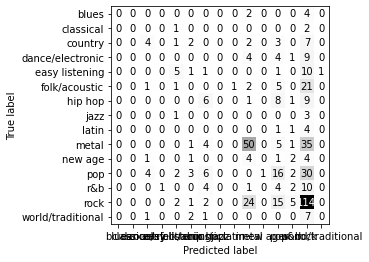

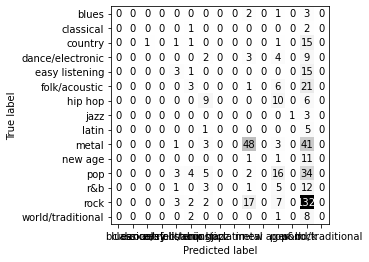

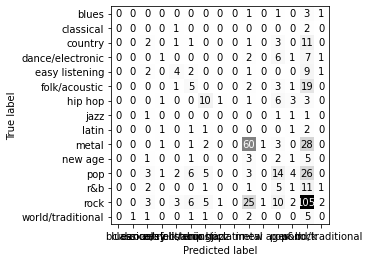

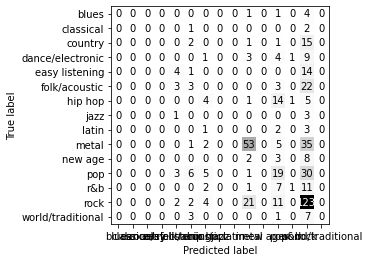

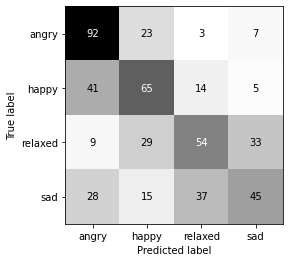

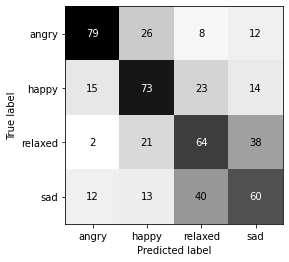

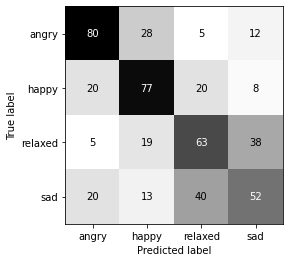

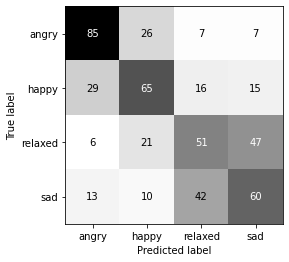

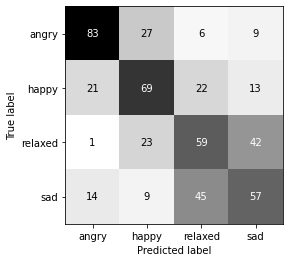

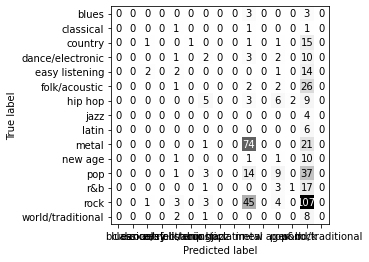

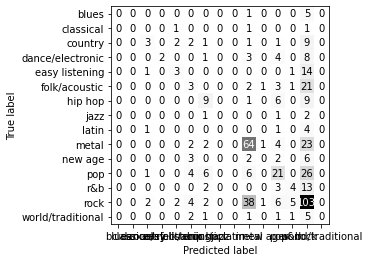

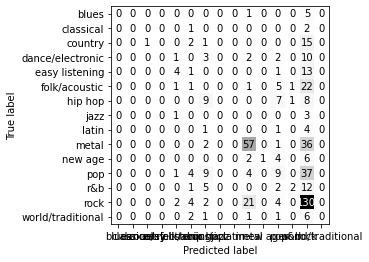

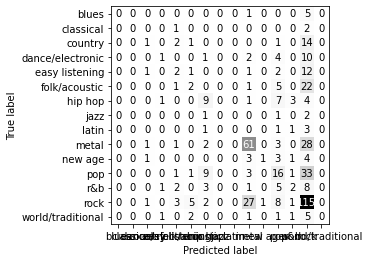

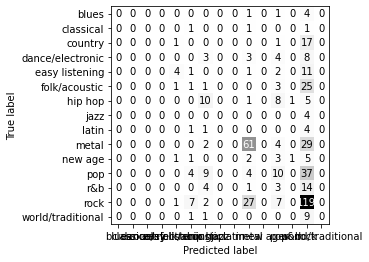

In [108]:
music_results = []

for X in music:
    for y in [labels['mood'], labels['genre']]:
        music_results.append(model_train_eval(X, y))

In [294]:
music_results = list(chain.from_iterable(music_results))

In [295]:
music_results_mood = []
music_results_gerne = []

for res in music_results:
    if res['y'] == 'mood':
        music_results_mood.append(res)
    else:
        music_results_gerne.append(res)

In [296]:
music_results_mood = pd.DataFrame(music_results_mood)
music_results_mood.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

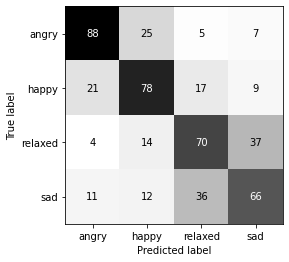

In [317]:
music_results_mood.loc[3, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.show()

In [297]:
music_results_gerne = pd.DataFrame(music_results_gerne)
music_results_gerne.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

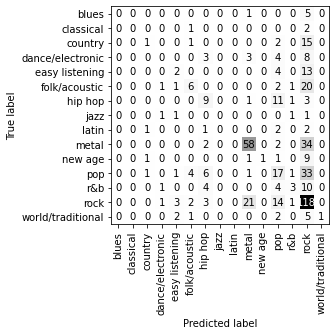

In [603]:
music_results_gerne.loc[2, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.xticks(rotation=90)
plt.show()

## Text

In [183]:
lyrics_plain = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/text/embeddings/lyrics_plain_embeddings.csv", index_col=0)
lyrics_weighted = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/text/embeddings/lyrics_weighted_embeddings.csv", index_col=0, header=1, names=lyrics_plain.columns)
lyrics_choruses = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/text/embeddings/choruses_embeddings.csv", index_col=0)
lyrics_summarized = pd.read_csv("/Users/sergiopicascia/Documents/GitHub/thesis/Data/text/embeddings/lyrics_summarized_embeddings.csv", index_col=0)

In [184]:
lyrics_plain.index += 1
lyrics_weighted.index += 1
lyrics_choruses.index += 1
lyrics_summarized.index += 1

In [185]:
lyrics_plain.name = "lyrics_plain"
lyrics_weighted.name = "lyrics_weighted"
lyrics_choruses.name = "lyrics_choruses"
lyrics_summarized.name = "lyrics_summarized"

In [219]:
for lyr in [lyrics_plain, lyrics_weighted, lyrics_choruses, lyrics_summarized]:
    for i in list(range(1, 2001)):
        if i not in list(lyr.index):
            lyr.loc[i, :] = 0

### SSWE only

In [220]:
lyrics_plain_sswe = lyrics_plain.iloc[:, :150]
lyrics_weighted_sswe = lyrics_weighted.iloc[:, :150]
lyrics_choruses_sswe = lyrics_choruses.iloc[:, :150]
lyrics_summarized_sswe = lyrics_summarized.iloc[:, :150]

lyrics_plain_sswe.name = "lyrics_plain_sswe"
lyrics_weighted_sswe.name = "lyrics_weighted_sswe"
lyrics_choruses_sswe.name = "lyrics_choruses_sswe"
lyrics_summarized_sswe.name = "lyrics_summarized_sswe"

In [221]:
lyrics_sswe = [lyrics_plain_sswe, lyrics_weighted_sswe, lyrics_choruses_sswe, lyrics_summarized_sswe]

#####
X: lyrics_plain_sswe | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#####
X: lyrics_plain_sswe | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_weighted_sswe | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits
#####
X: lyrics_weighted_sswe | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_choruses_sswe | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits
#####
X: lyrics_choruses_sswe | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_summarized_sswe | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_summarized_sswe | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


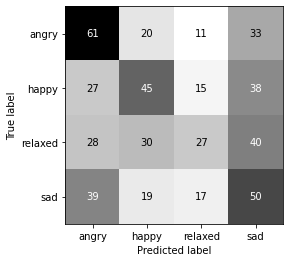

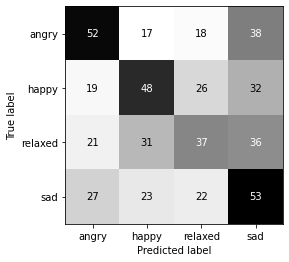

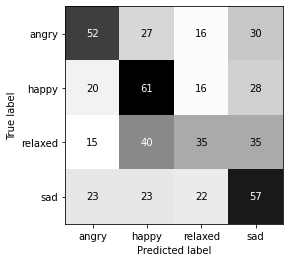

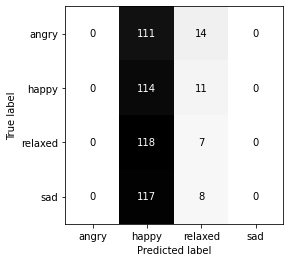

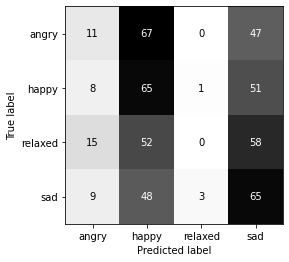

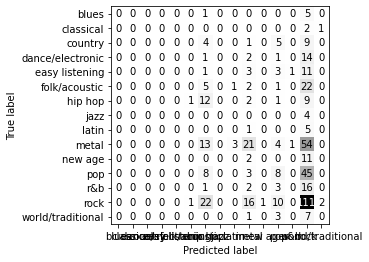

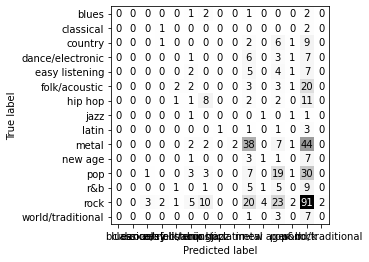

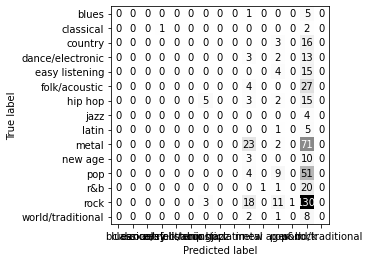

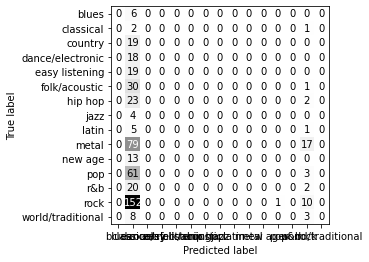

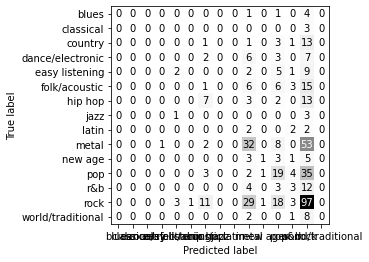

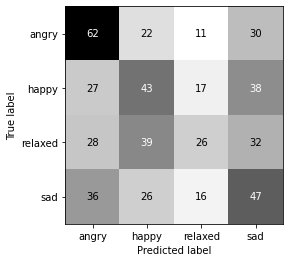

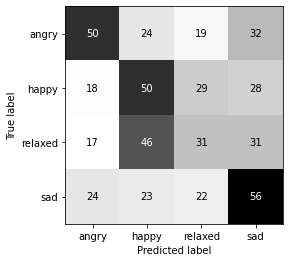

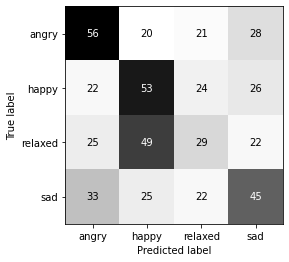

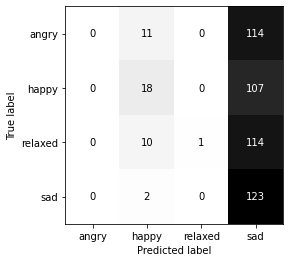

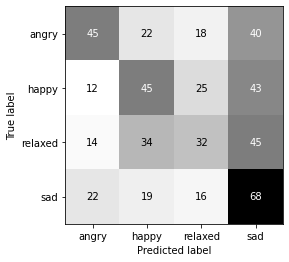

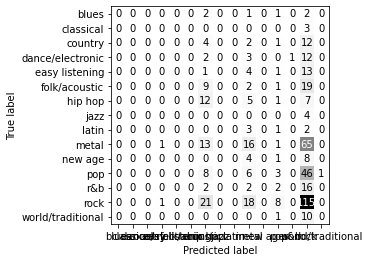

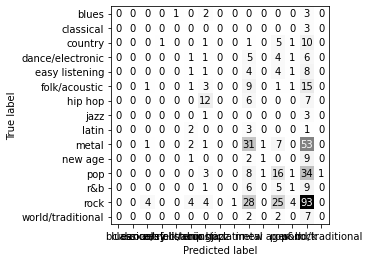

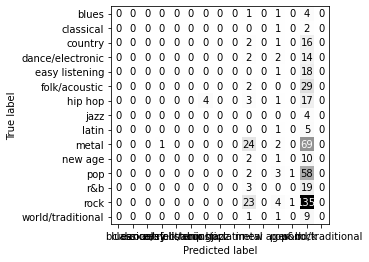

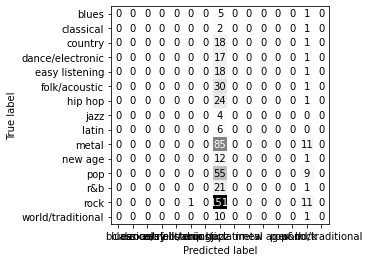

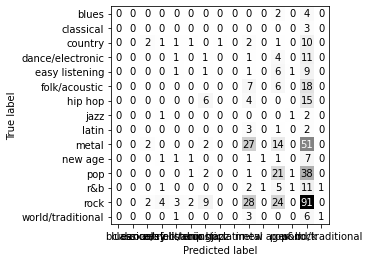

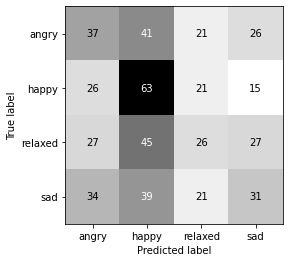

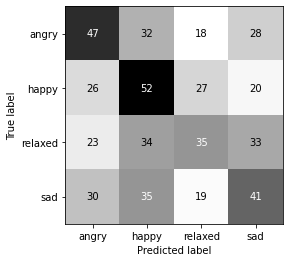

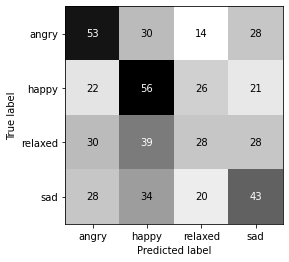

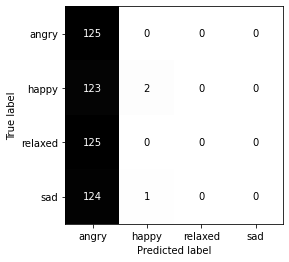

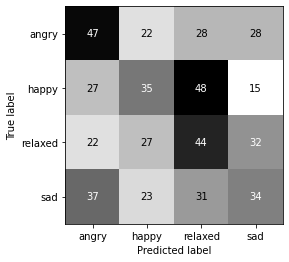

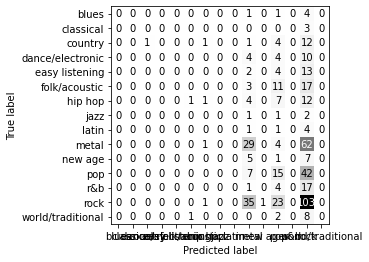

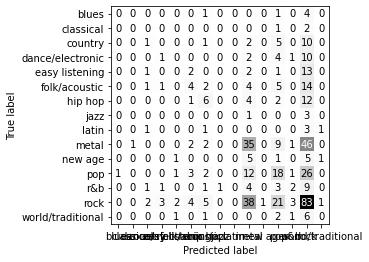

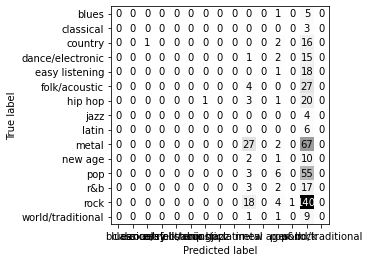

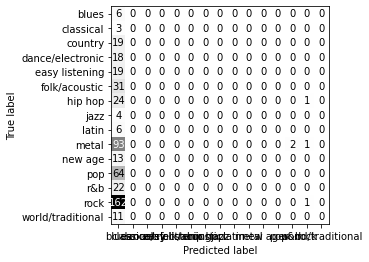

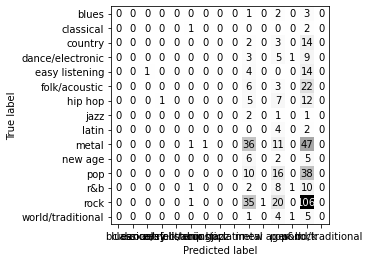

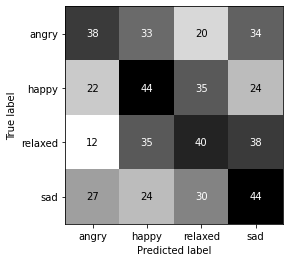

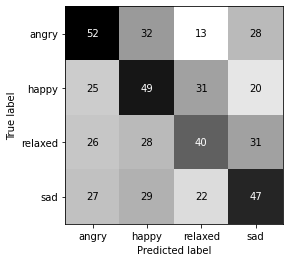

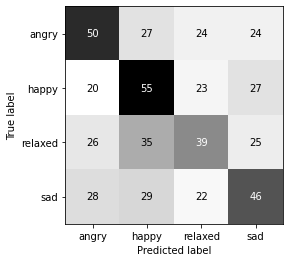

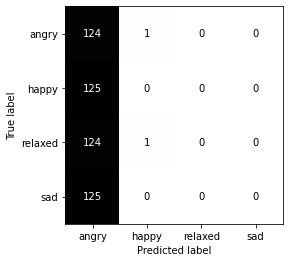

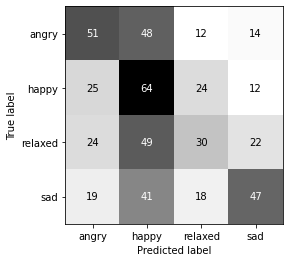

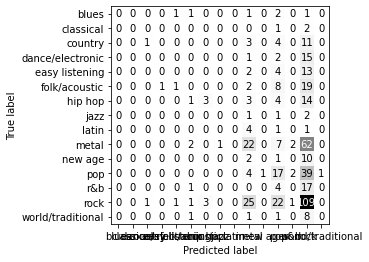

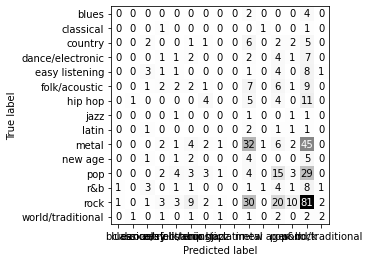

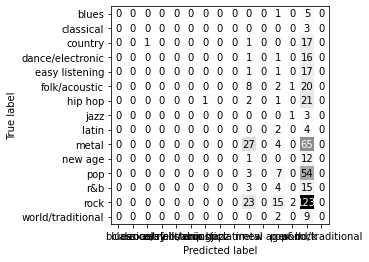

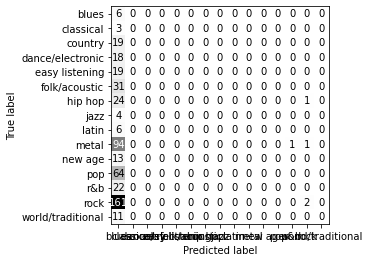

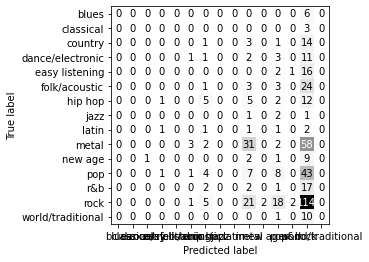

In [224]:
lyrics_sswe_results = []

for X in lyrics_sswe:
    for y in [labels['mood'], labels['genre']]:
        lyrics_sswe_results.append(model_train_eval(X, y))

In [298]:
lyrics_sswe_results = list(chain.from_iterable(lyrics_sswe_results))

In [299]:
lyrics_sswe_results_mood = []
lyrics_sswe_results_genre = []

for res in lyrics_sswe_results:
    if res['y'] == 'mood':
        lyrics_sswe_results_mood.append(res)
    else:
        lyrics_sswe_results_genre.append(res)

In [300]:
lyrics_sswe_results_mood = pd.DataFrame(lyrics_sswe_results_mood)
lyrics_sswe_results_mood.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

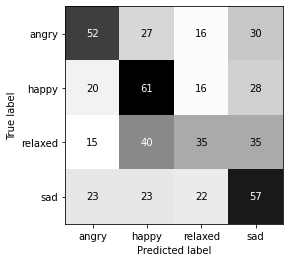

In [319]:
lyrics_sswe_results_mood.loc[2, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.show()

In [301]:
lyrics_sswe_results_genre = pd.DataFrame(lyrics_sswe_results_genre)
lyrics_sswe_results_genre.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

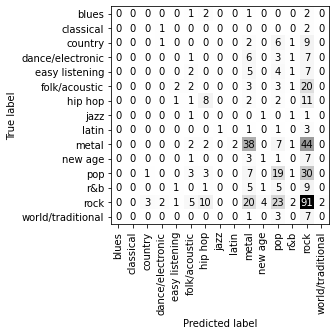

In [602]:
lyrics_sswe_results_genre.loc[1, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.xticks(rotation=90)
plt.show()

### sBERT only

In [225]:
lyrics_plain_sbert = lyrics_plain.iloc[:, 150:]
lyrics_weighted_sbert = lyrics_weighted.iloc[:, 150:]
lyrics_choruses_sbert = lyrics_choruses.iloc[:, 150:]
lyrics_summarized_sbert = lyrics_summarized.iloc[:, 150:]

lyrics_plain_sbert.name = "lyrics_plain_sbert"
lyrics_weighted_sbert.name = "lyrics_weighted_sbert"
lyrics_choruses_sbert.name = "lyrics_choruses_sbert"
lyrics_summarized_sbert.name = "lyrics_summarized_sbert"

In [226]:
lyrics_sbert = [lyrics_plain_sbert, lyrics_weighted_sbert, lyrics_choruses_sbert, lyrics_summarized_sbert]

#####
X: lyrics_plain_sbert | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_plain_sbert | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_weighted_sbert | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits
#####
X: lyrics_weighted_sbert | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_choruses_sbert | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits
#####
X: lyrics_choruses_sbert | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_summarized_sbert | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#####
X: lyrics_summarized_sbert | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


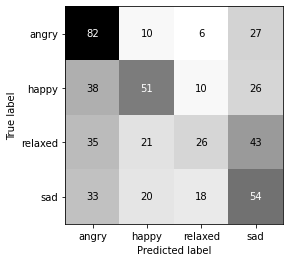

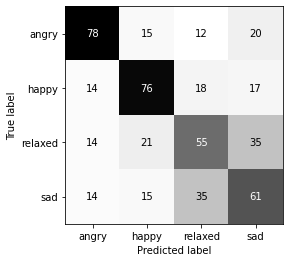

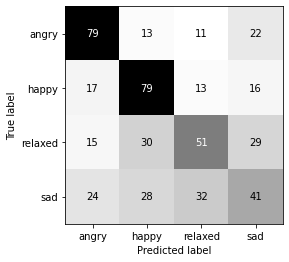

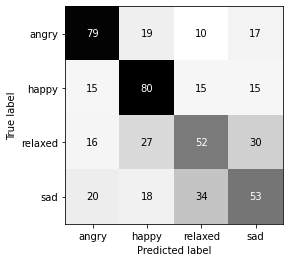

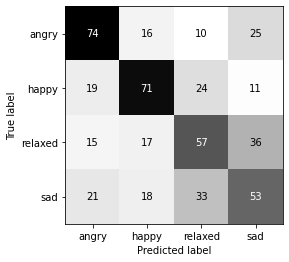

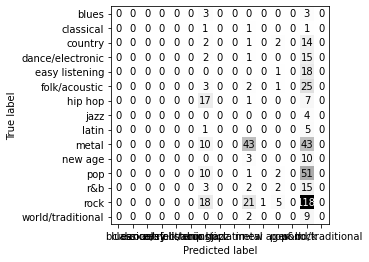

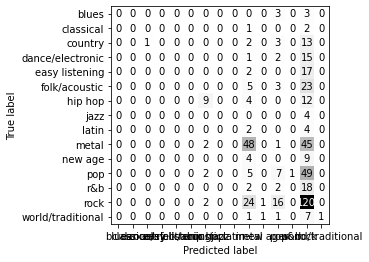

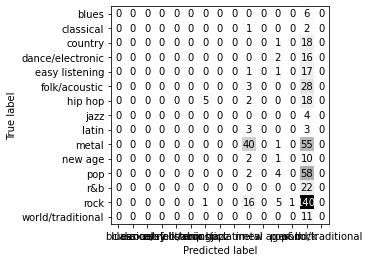

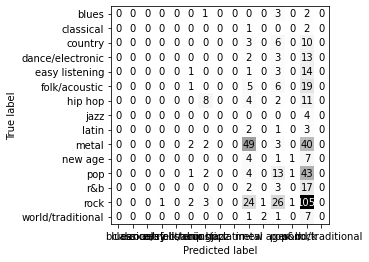

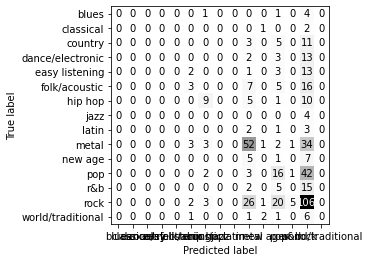

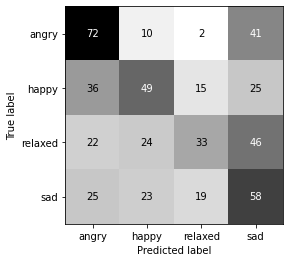

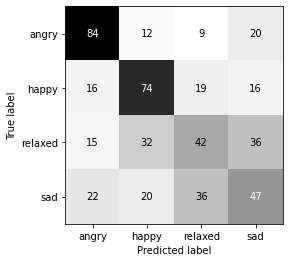

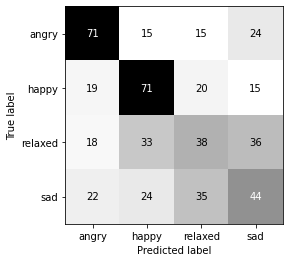

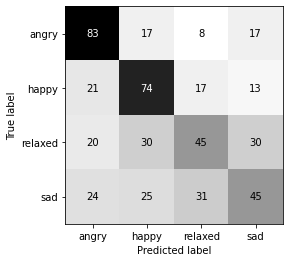

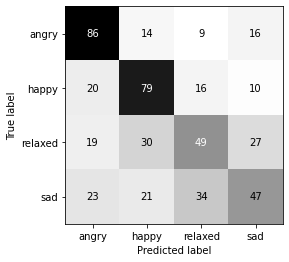

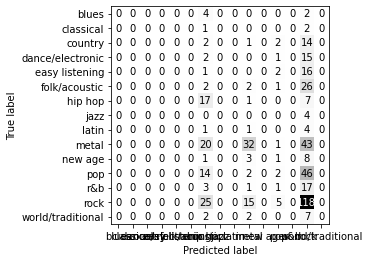

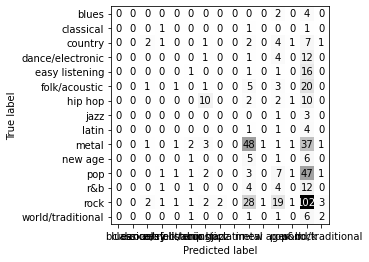

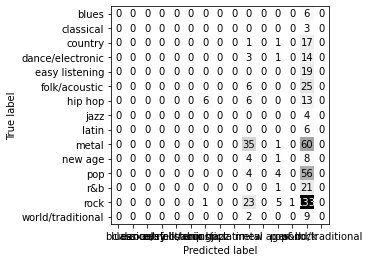

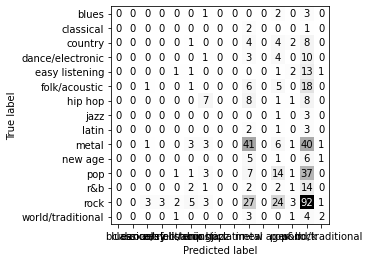

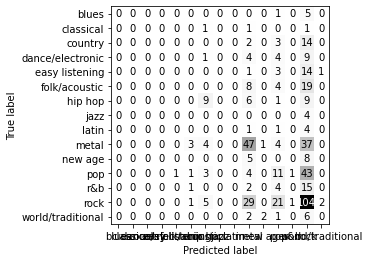

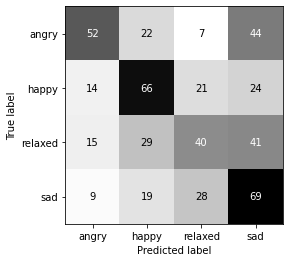

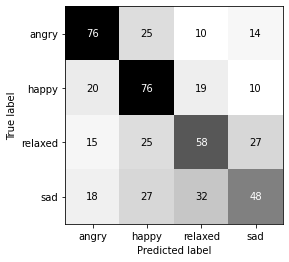

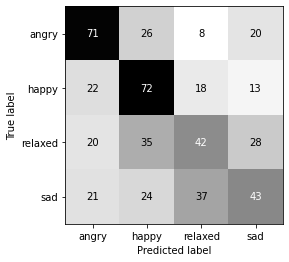

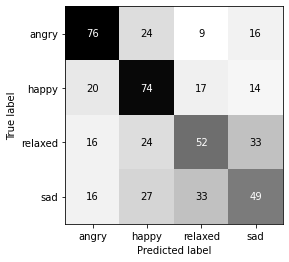

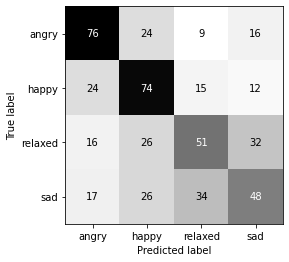

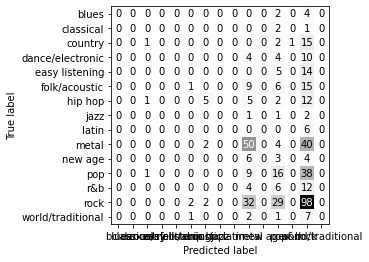

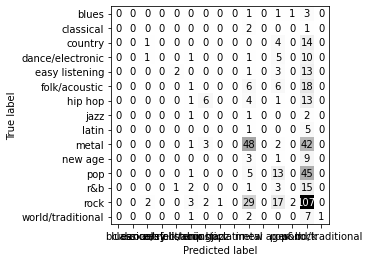

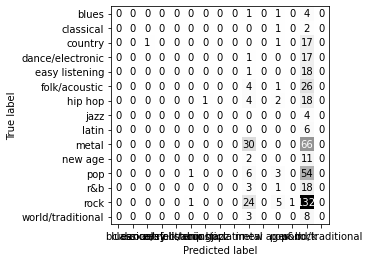

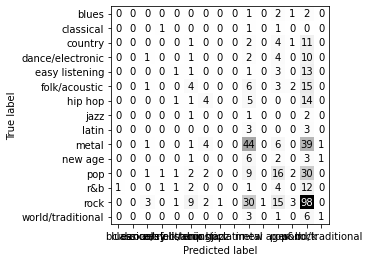

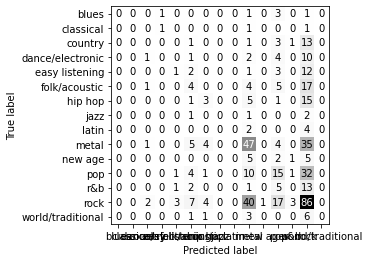

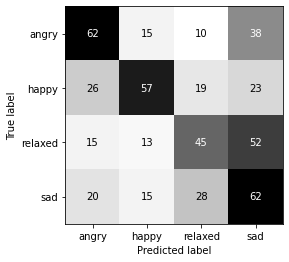

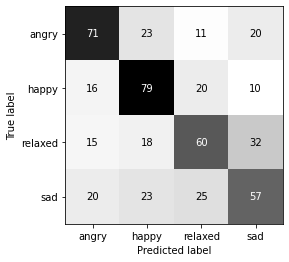

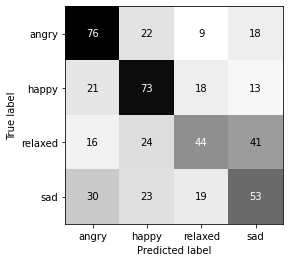

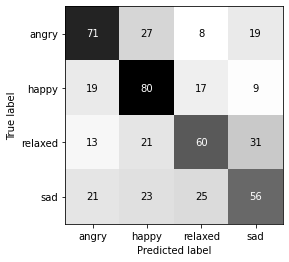

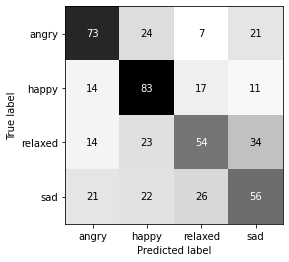

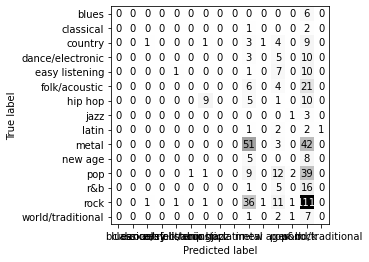

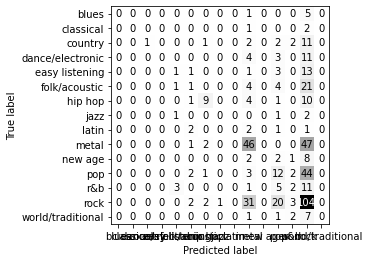

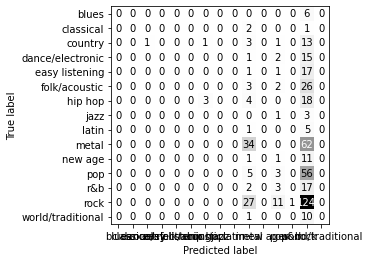

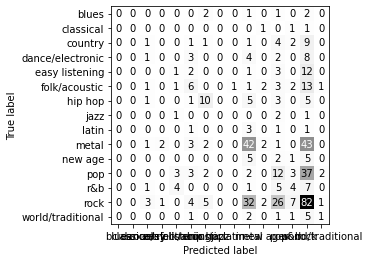

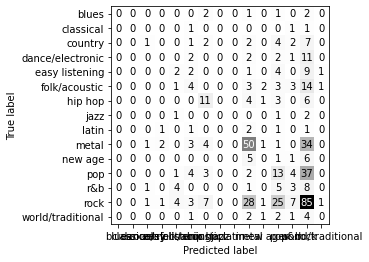

In [227]:
lyrics_sbert_results = []

for X in lyrics_sbert:
    for y in [labels['mood'], labels['genre']]:
        lyrics_sbert_results.append(model_train_eval(X, y))

In [302]:
lyrics_sbert_results = list(chain.from_iterable(lyrics_sbert_results))

In [303]:
lyrics_sbert_results_mood = []
lyrics_sbert_results_gerne = []

for res in lyrics_sbert_results:
    if res['y'] == 'mood':
        lyrics_sbert_results_mood.append(res)
    else:
        lyrics_sbert_results_gerne.append(res)

In [304]:
lyrics_sbert_results_mood = pd.DataFrame(lyrics_sbert_results_mood)
lyrics_sbert_results_mood.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

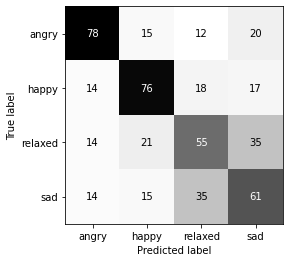

In [322]:
lyrics_sbert_results_mood.loc[1, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.show()

In [305]:
lyrics_sbert_results_gerne = pd.DataFrame(lyrics_sbert_results_gerne)
lyrics_sbert_results_gerne.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

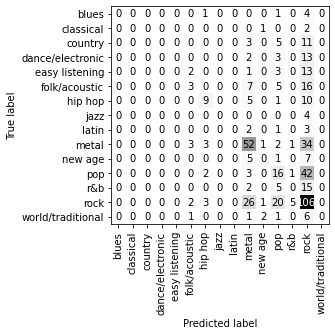

In [601]:
lyrics_sbert_results_gerne.loc[4, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.xticks(rotation=90)
plt.show()

### SSWE+sBERT

In [228]:
lyrics = [lyrics_plain, lyrics_weighted, lyrics_choruses, lyrics_summarized]

#####
X: lyrics_plain | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_plain | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_weighted | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_weighted | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_choruses | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_choruses | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_summarized | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: lyrics_summarized | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


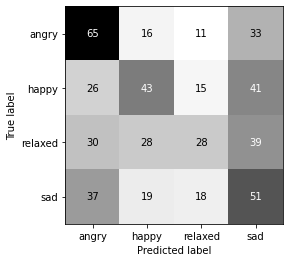

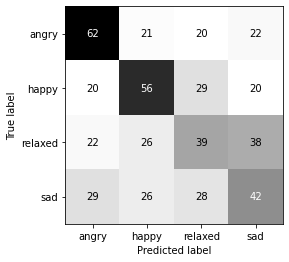

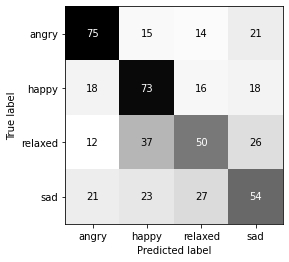

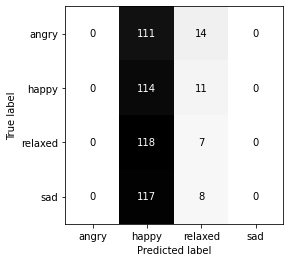

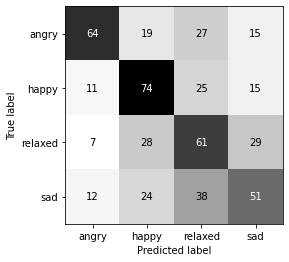

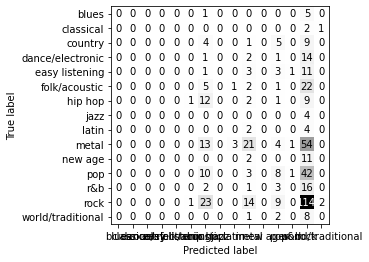

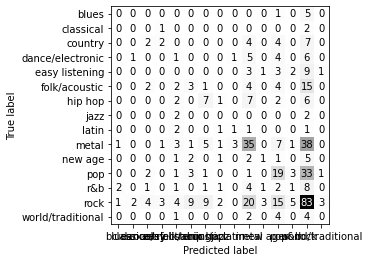

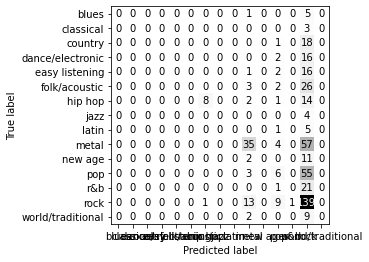

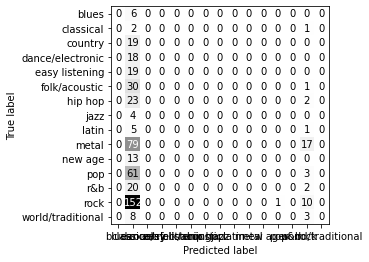

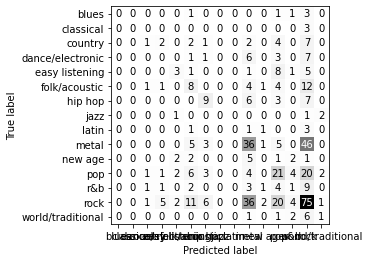

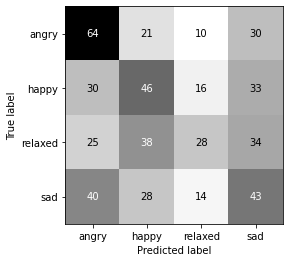

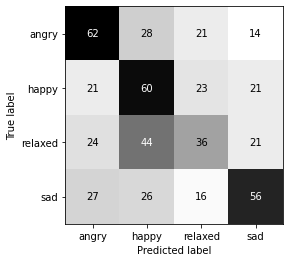

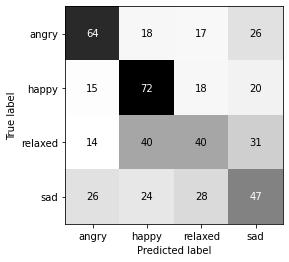

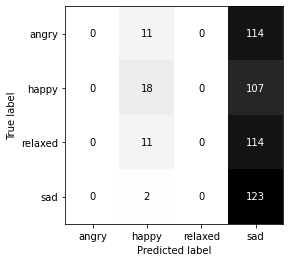

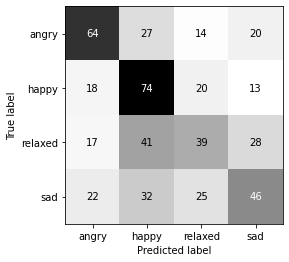

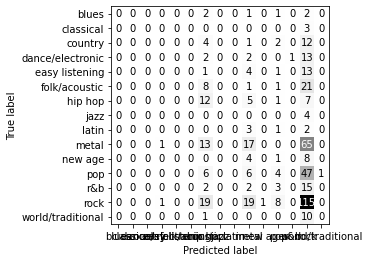

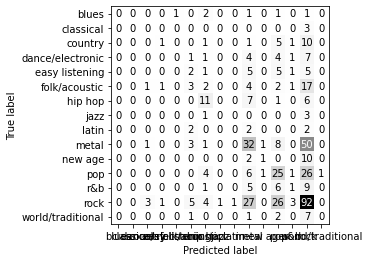

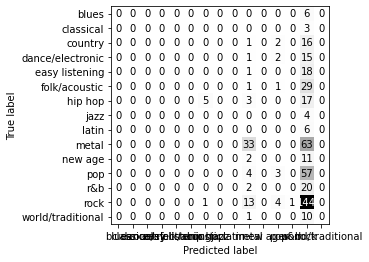

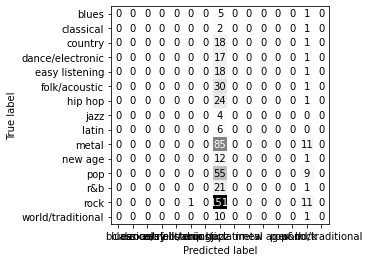

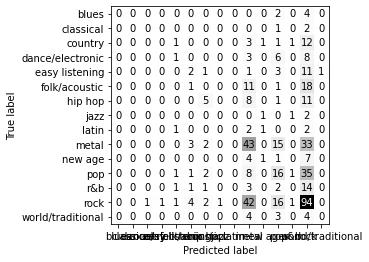

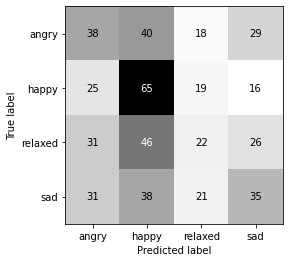

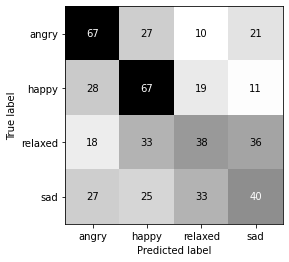

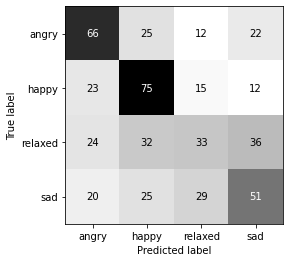

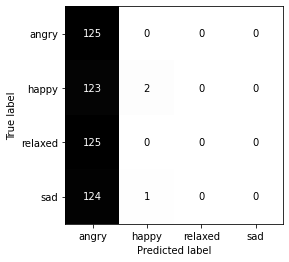

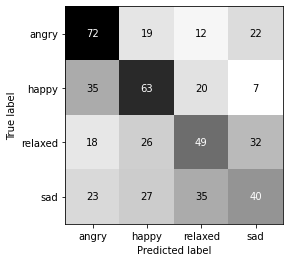

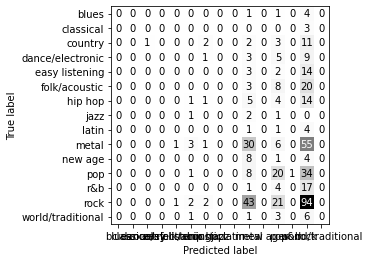

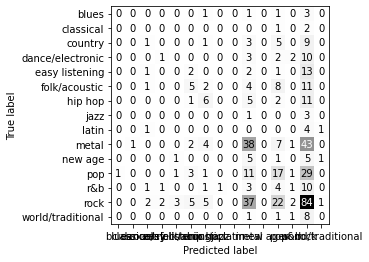

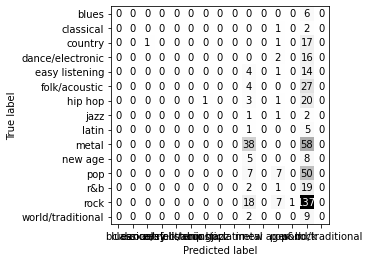

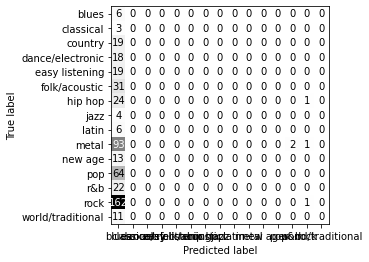

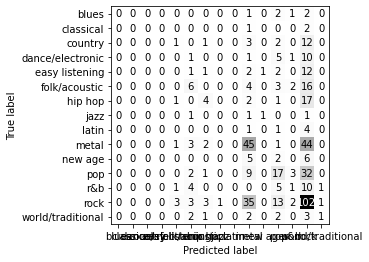

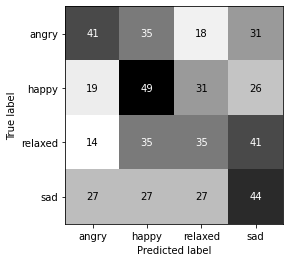

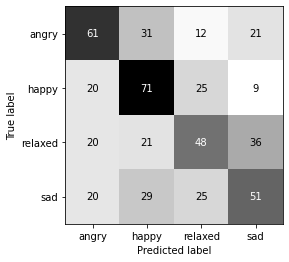

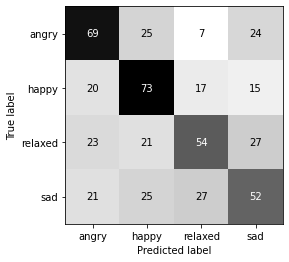

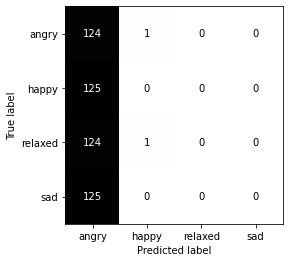

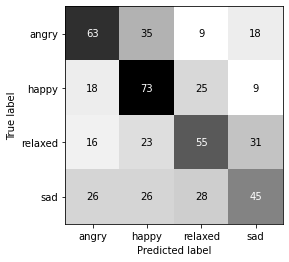

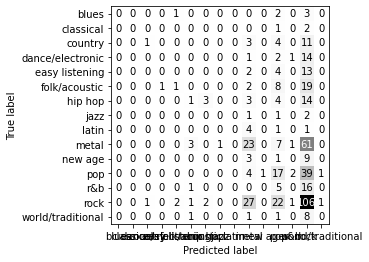

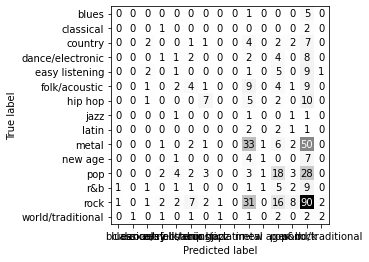

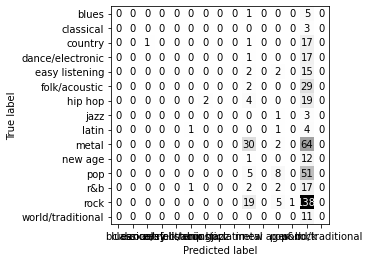

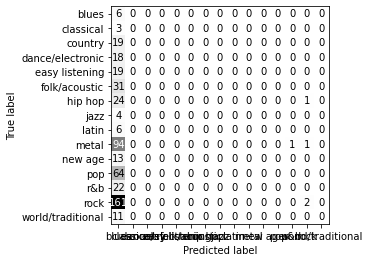

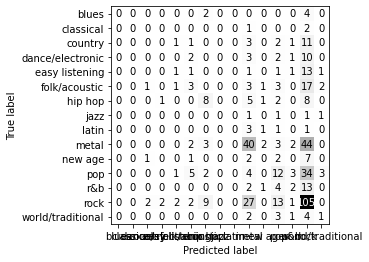

In [229]:
lyrics_results = []

for X in lyrics:
    for y in [labels['mood'], labels['genre']]:
        lyrics_results.append(model_train_eval(X, y))

In [306]:
lyrics_results = list(chain.from_iterable(lyrics_results))

In [307]:
lyrics_results_mood = []
lyrics_results_gerne = []

for res in lyrics_results:
    if res['y'] == 'mood':
        lyrics_results_mood.append(res)
    else:
        lyrics_results_gerne.append(res)

In [308]:
lyrics_results_mood = pd.DataFrame(lyrics_results_mood)
lyrics_results_mood.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

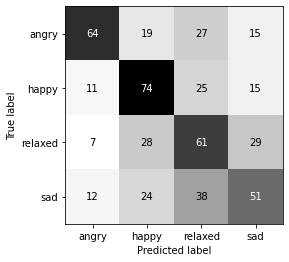

In [324]:
lyrics_results_mood.loc[4, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.show()

In [309]:
lyrics_results_gerne = pd.DataFrame(lyrics_results_gerne)
lyrics_results_gerne.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

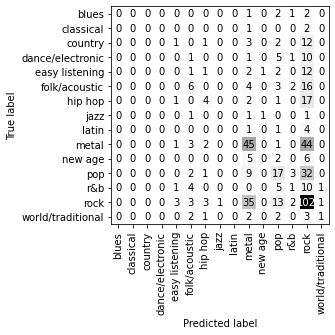

In [600]:
lyrics_results_gerne.loc[14, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.xticks(rotation=90)
plt.show()

# Multimodal Models

## High Level Fusion

In [390]:
# Best models
vocals_mood_clf = vocals_results_mood.loc[4, 'grid'].best_estimator_
vocals_genre_clf = vocals_results_genre.loc[4, 'grid'].best_estimator_
music_mood_clf = music_results_mood.loc[3, 'grid'].best_estimator_
music_genre_clf = music_results_gerne.loc[2, 'grid'].best_estimator_
lyrics_mood_clf = lyrics_sbert_results_mood.loc[3, 'grid'].best_estimator_
lyrics_genre_clf = lyrics_sbert_results_gerne.loc[4, 'grid'].best_estimator_

In [372]:
# True labels
mood_train, mood_test = train_test_split(labels['mood'], random_state=16, stratify=labels['mood'])
genre_train, genre_test = train_test_split(labels['genre'], random_state=16, stratify=labels['genre'])

In [408]:
# Class lists
moods = vocals_results_mood.loc[4, 'grid'].classes_
genres = vocals_results_genre.loc[4, 'grid'].classes_

In [555]:
# Feature scaling/extraction
vocals_scaled = StandardScaler().fit_transform(vocals_full.values)
vocals_mood_test = vocals_scaled[mood_test.index - 1]
vocals_genre_test = vocals_scaled[genre_test.index - 1]

music_scaled = StandardScaler().fit_transform(music_full.values)
music_mood_test = music_scaled[mood_test.index - 1]
music_genre_test = music_scaled[genre_test.index - 1]

lyrics_mood_test = lyrics_plain.loc[mood_test.index, 'sbert.0':]
lyrics_genre_test =  lyrics_plain.loc[genre_test.index, 'sbert.0':]

In [428]:
# Predicted probabilities
vocals_mood_pred = vocals_mood_clf.predict_proba(vocals_mood_test)
vocals_genre_pred = vocals_genre_clf.predict_proba(vocals_genre_test)
music_mood_pred = music_mood_clf.predict_proba(music_mood_test)
music_genre_pred = music_genre_clf.predict_proba(music_genre_test)
lyrics_mood_pred = lyrics_mood_clf.predict_proba(lyrics_mood_test)
lyrics_genre_pred = lyrics_genre_clf.predict_proba(lyrics_genre_test)

In [485]:
def soft_voting(predictions, labels):
    
    votes = []

    for p in zip(*predictions):
        idx = np.argmax(sum(list(p)))
        y_pred = labels[idx]
        votes.append(y_pred)
        
    return votes

In [536]:
def metrics_calc(y_true, y_pred):
    
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted')
    conf_mat = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Greys', colorbar=False)
    
    return {'f1': f1, 'accuracy': acc, 'precision': prec, 'recall': rec, 'confusion_matrix': conf_mat}

### Mood

{'f1': 0.6503994004800938,
 'accuracy': 0.65,
 'precision': 0.6528932754671266,
 'recall': 0.65,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd746902130>}

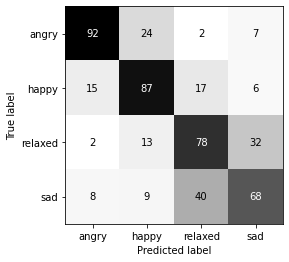

In [522]:
# Vocals + Music
metrics_calc(mood_test, soft_voting([vocals_mood_pred, music_mood_pred], moods))

{'f1': 0.6524193286075226,
 'accuracy': 0.652,
 'precision': 0.6532953169862276,
 'recall': 0.652,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd7741c9430>}

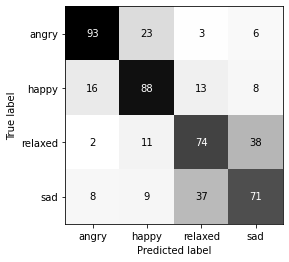

In [523]:
# Vocals + Lyrics
metrics_calc(mood_test, soft_voting([vocals_mood_pred, lyrics_mood_pred], moods))

{'f1': 0.6446075005823434,
 'accuracy': 0.646,
 'precision': 0.6447449122526163,
 'recall': 0.646,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd7468d7b80>}

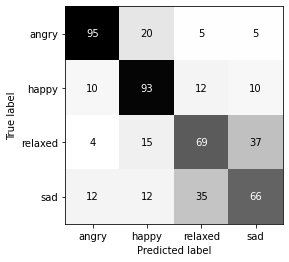

In [524]:
# Music + Lyrics
metrics_calc(mood_test, soft_voting([music_mood_pred, lyrics_mood_pred], moods))

{'f1': 0.6801279196777354,
 'accuracy': 0.68,
 'precision': 0.6824330465714766,
 'recall': 0.68,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd74675d9a0>}

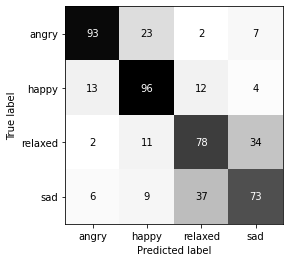

In [525]:
# Vocals + Music + Lyrics
metrics_calc(mood_test, soft_voting([vocals_mood_pred, music_mood_pred, lyrics_mood_pred], moods))

### Genre

{'f1': 0.46438374908777097,
 'accuracy': 0.516,
 'precision': 0.4818013546018045,
 'recall': 0.516,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd74675de80>}

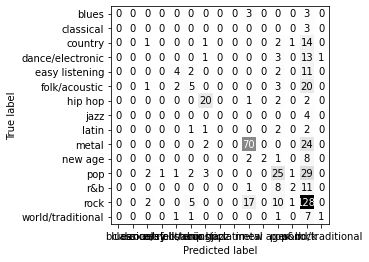

In [537]:
# Vocals + Music
metrics_calc(genre_test, soft_voting([vocals_genre_pred, music_genre_pred], genres))

{'f1': 0.43337613216664633,
 'accuracy': 0.502,
 'precision': 0.4385994229136536,
 'recall': 0.502,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd7a0e43c40>}

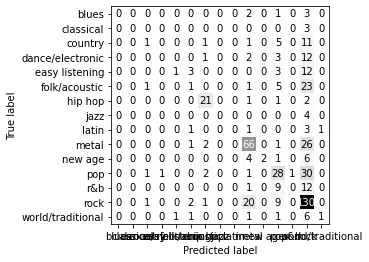

In [538]:
# Vocals + Lyrics
metrics_calc(genre_test, soft_voting([vocals_genre_pred, lyrics_genre_pred], genres))

{'f1': 0.35878506701996327,
 'accuracy': 0.428,
 'precision': 0.3684660852713178,
 'recall': 0.428,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd72b7a3040>}

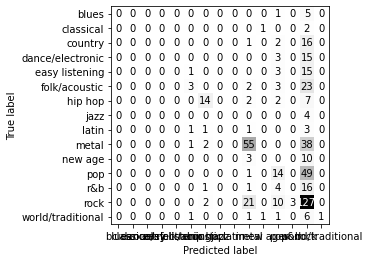

In [539]:
# Music + Lyrics
metrics_calc(genre_test, soft_voting([music_genre_pred, lyrics_genre_pred], genres))

{'f1': 0.43814012020909243,
 'accuracy': 0.512,
 'precision': 0.4978306621199205,
 'recall': 0.512,
 'confusion_matrix': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd7a13ff8b0>}

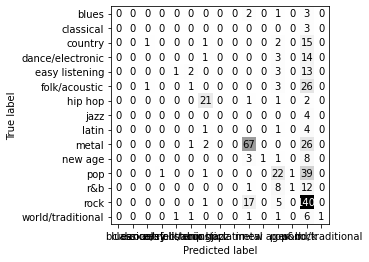

In [540]:
# Vocals + Music + Lyrics
metrics_calc(genre_test, soft_voting([vocals_genre_pred, music_genre_pred, lyrics_genre_pred], genres))

## Low Level Fusion

In [560]:
# Input data
vocals_scaled = pd.DataFrame(vocals_scaled, columns=vocals_full.columns, index=vocals_full.index)
music_scaled = pd.DataFrame(music_scaled, columns=music_full.columns, index=music_full.index)

In [582]:
vocals_music = pd.concat([vocals_scaled, music_scaled], axis=1)
vocals_lyrics = pd.concat([vocals_scaled, lyrics_plain.loc[:, 'sbert.0':]], axis=1)
music_lyrics = pd.concat([music_scaled, lyrics_plain.loc[:, 'sbert.0':]], axis=1)
vocals_music_lyrics = pd.concat([vocals_scaled, music_scaled, lyrics_plain.loc[:, 'sbert.0':]], axis=1)

In [583]:
vocals_music.name = 'vocals_music'
vocals_lyrics.name = 'vocals_lyrics'
music_lyrics.name = 'music_lyrics'
vocals_music_lyrics.name = 'vocals_music_lyrics'

In [584]:
multi_input_data = [vocals_music, vocals_lyrics, music_lyrics, vocals_music_lyrics]

#####
X: vocals_music | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#####
X: vocals_music | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_lyrics | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_lyrics | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: music_lyrics | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: music_lyrics | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_music_lyrics | y: mood 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#####
X: vocals_music_lyrics | y: genre 
#####
Training KNN
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training SVM
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Training RF
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training LR
Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training MLP
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/sergiopicascia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


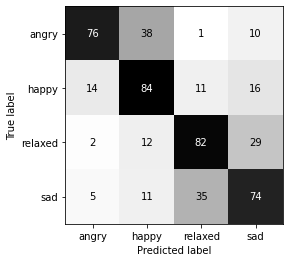

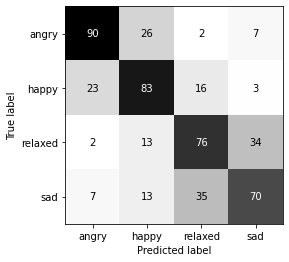

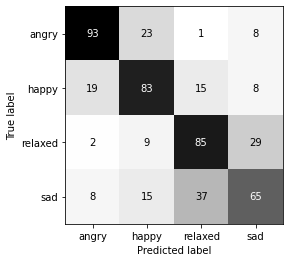

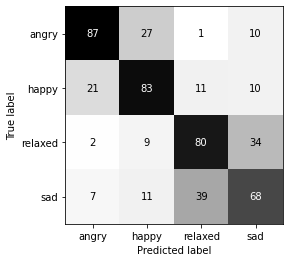

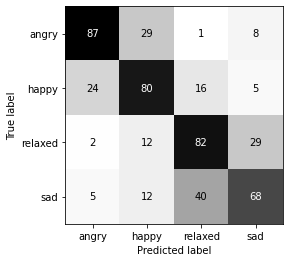

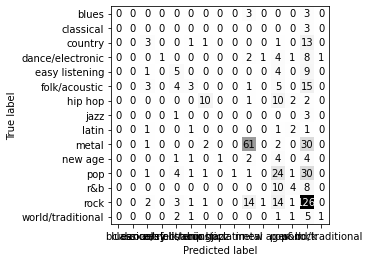

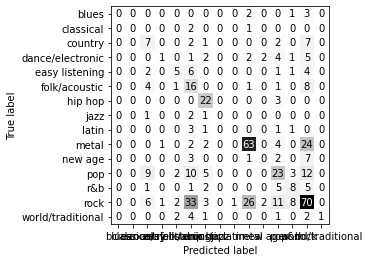

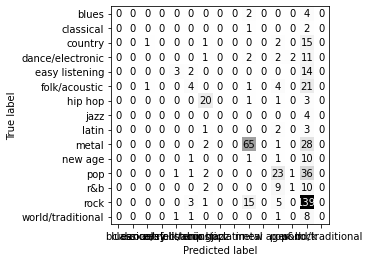

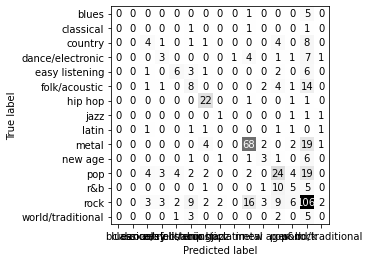

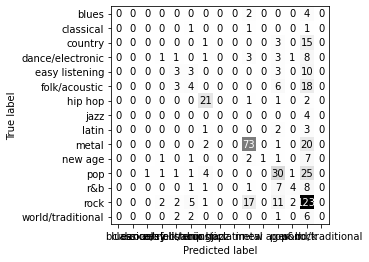

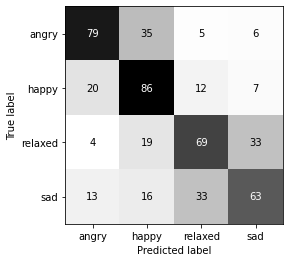

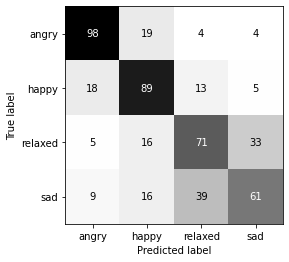

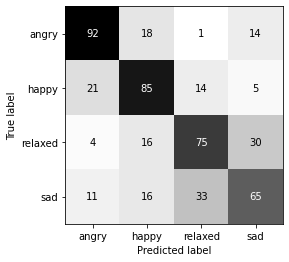

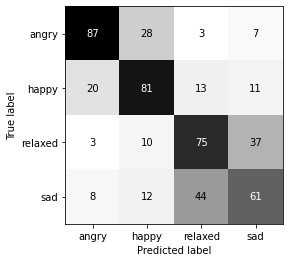

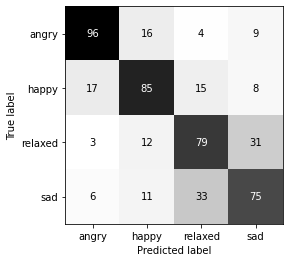

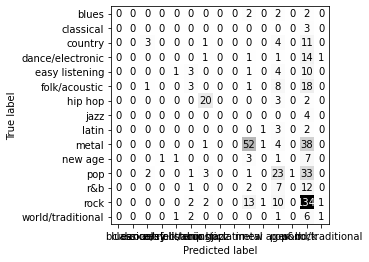

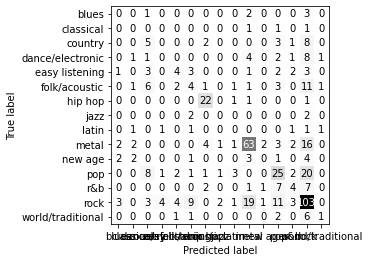

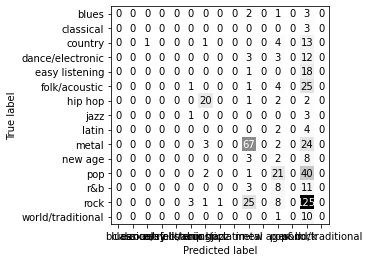

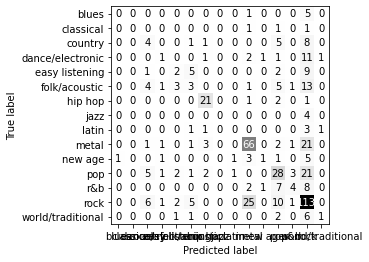

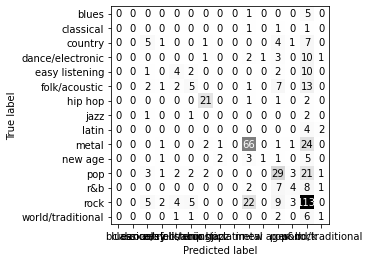

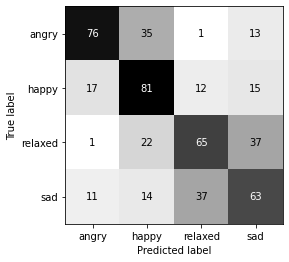

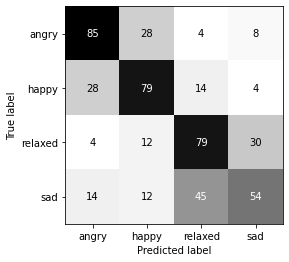

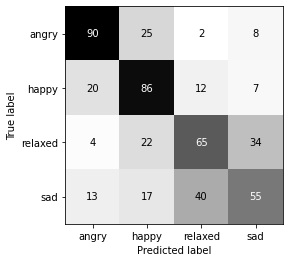

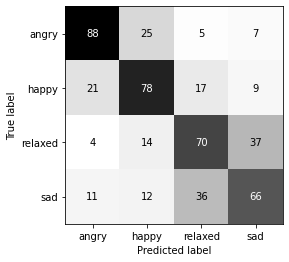

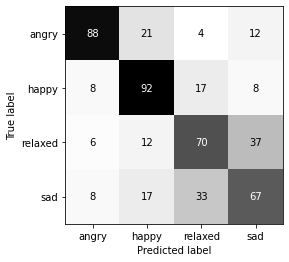

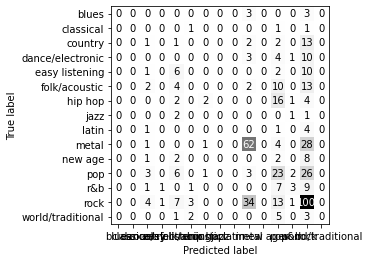

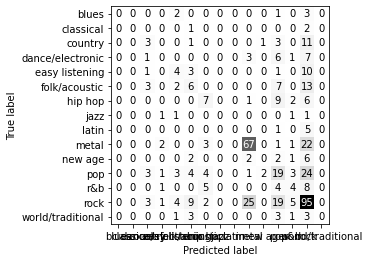

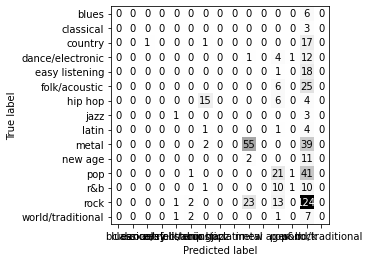

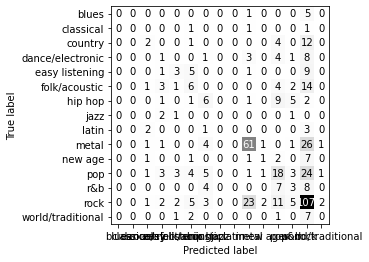

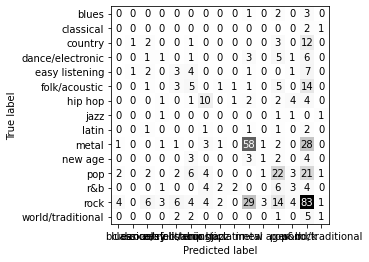

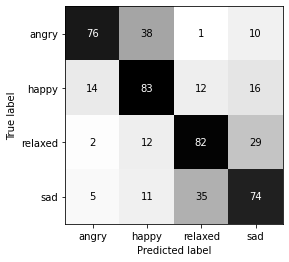

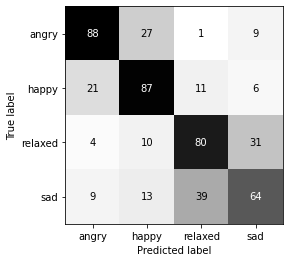

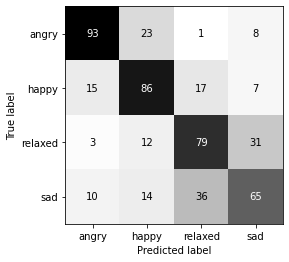

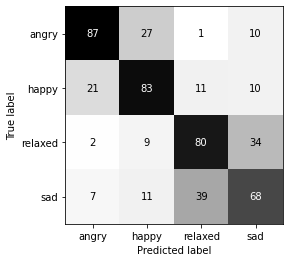

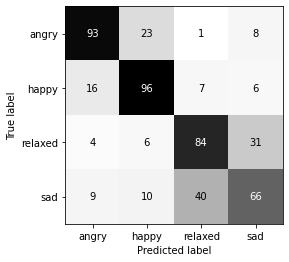

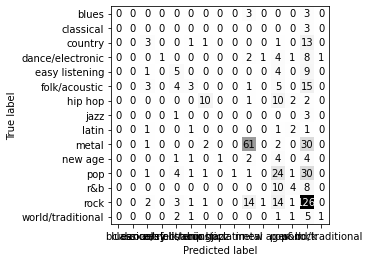

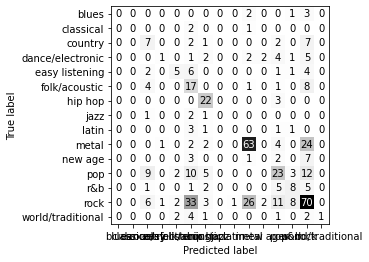

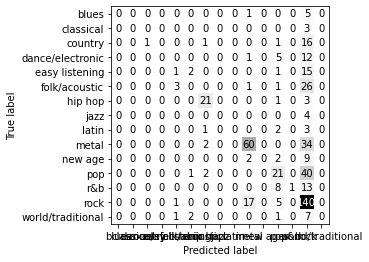

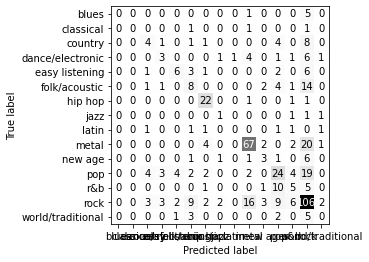

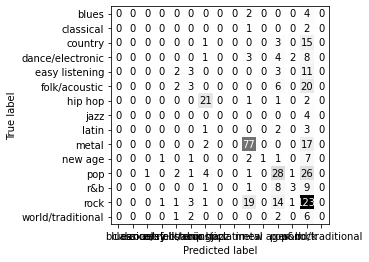

In [585]:
multi_modal_results = []

for X in multi_input_data:
    for y in [labels['mood'], labels['genre']]:
        multi_modal_results.append(model_train_eval(X, y))

In [590]:
multi_modal_results = list(chain.from_iterable(multi_modal_results))

In [591]:
multi_modal_results_mood = []
multi_modal_results_gerne = []

for res in multi_modal_results:
    if res['y'] == 'mood':
        multi_modal_results_mood.append(res)
    else:
        multi_modal_results_gerne.append(res)

In [592]:
multi_modal_results_mood = pd.DataFrame(multi_modal_results_mood)
multi_modal_results_mood.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

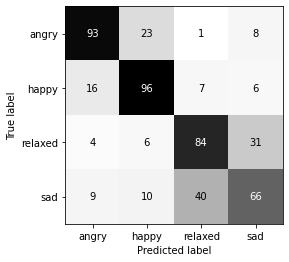

In [599]:
multi_modal_results_mood.loc[19, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.show()

In [593]:
multi_modal_results_gerne = pd.DataFrame(multi_modal_results_gerne)
multi_modal_results_gerne.iloc[:, :8].style.highlight_max(color = 'lightgreen', axis = 0)

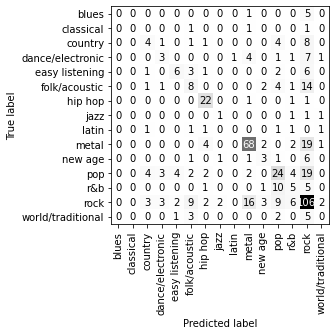

In [597]:
multi_modal_results_gerne.loc[3, 'conf_matrix'].plot(cmap='Greys', colorbar=False)
plt.xticks(rotation=90)
plt.show()

# Mood-Genre Correlation

In [606]:
pd.crosstab(labels['mood'], labels['genre'])

genre    blues  classical  country  dance/electronic  easy listening  \
mood                                                                   
angry       11          1        1                 3               1   
happy        7          2       25                20              22   
relaxed      2          4       19                40              43   
sad          3          6       32                10              11   

genre    folk/acoustic  hip hop  jazz  latin  metal  new age  pop  r&b  rock  \
mood                                                                           
angry                4       49     0      2    242        3    9    2   171   
happy               14       30     1     11     22        1  125   25   186   
relaxed             63       11    16      9     11       26   55   55   119   
sad                 45       11     0      2    108       20   66    5   175   

genre    world/traditional  
mood                        
angry                    1  
happy                    9  
relaxed                 27  
sad                      6

In [614]:
chi2_contingency(pd.crosstab(labels['mood'], labels['genre']))

(933.8912898568286,
 1.6836560220653772e-168,
 42,
 array([[  5.75,   3.25,  19.25,  18.25,  19.25,  31.5 ,  25.25,   4.25,
           6.  ,  95.75,  12.5 ,  63.75,  21.75, 162.75,  10.75],
        [  5.75,   3.25,  19.25,  18.25,  19.25,  31.5 ,  25.25,   4.25,
           6.  ,  95.75,  12.5 ,  63.75,  21.75, 162.75,  10.75],
        [  5.75,   3.25,  19.25,  18.25,  19.25,  31.5 ,  25.25,   4.25,
           6.  ,  95.75,  12.5 ,  63.75,  21.75, 162.75,  10.75],
        [  5.75,   3.25,  19.25,  18.25,  19.25,  31.5 ,  25.25,   4.25,
           6.  ,  95.75,  12.5 ,  63.75,  21.75, 162.75,  10.75]]))

In [629]:
predicted_values = [
    multi_modal_results_mood.loc[19, 'grid'].best_estimator_.predict(vocals_music_lyrics),
    multi_modal_results_gerne.loc[3, 'grid'].best_estimator_.predict(vocals_music)
]

In [630]:
predicted_values = pd.DataFrame(predicted_values, index=['mood', 'genre']).transpose()

In [631]:
pd.crosstab(predicted_values['mood'], predicted_values['genre'])

genre    blues  classical  country  dance/electronic  easy listening  \
mood                                                                   
angry        2          1        2                 1               1   
happy        3          0       17                10              13   
relaxed      1          3       13                26              48   
sad          2          1       24                11               8   

genre    folk/acoustic  hip hop  jazz  latin  metal  new age  pop  r&b  rock  \
mood                                                                           
angry                0       51     0      0    247        2    9    2   177   
happy                3       42     0      5     27        1  124   26   239   
relaxed             61        9    10      1     13       16   68   43   176   
sad                 35        7     0      2     89       12   53    2   235   

genre    world/traditional  
mood                        
angry                    2  
happy                    0  
relaxed                 19  
sad                      5

In [632]:
chi2_contingency(pd.crosstab(predicted_values['mood'], predicted_values['genre']))

(927.0929044709235,
 4.35696942411106e-167,
 42,
 array([[  1.988 ,   1.2425,  13.916 ,  11.928 ,  17.395 ,  24.6015,
          27.0865,   2.485 ,   1.988 ,  93.436 ,   7.7035,  63.119 ,
          18.1405, 205.5095,   6.461 ],
        [  2.04  ,   1.275 ,  14.28  ,  12.24  ,  17.85  ,  25.245 ,
          27.795 ,   2.55  ,   2.04  ,  95.88  ,   7.905 ,  64.77  ,
          18.615 , 210.885 ,   6.63  ],
        [  2.028 ,   1.2675,  14.196 ,  12.168 ,  17.745 ,  25.0965,
          27.6315,   2.535 ,   2.028 ,  95.316 ,   7.8585,  64.389 ,
          18.5055, 209.6445,   6.591 ],
        [  1.944 ,   1.215 ,  13.608 ,  11.664 ,  17.01  ,  24.057 ,
          26.487 ,   2.43  ,   1.944 ,  91.368 ,   7.533 ,  61.722 ,
          17.739 , 200.961 ,   6.318 ]]))

In [641]:
val = {'happy': 'positive', 'relaxed': 'positive', 'angry': 'negative', 'sad': 'negative'}
ar = {'happy': 'active', 'relaxed': 'passive', 'angry': 'active', 'sad': 'passive'}

labels['valence'] = labels['mood'].astype('category').map(val)
labels['arousal'] = labels['mood'].astype('category').map(ar)

In [642]:
pd.crosstab(labels['valence'], labels['genre'])

genre     blues  classical  country  dance/electronic  easy listening  \
valence                                                                 
negative     14          7       33                13              12   
positive      9          6       44                60              65   

genre     folk/acoustic  hip hop  jazz  latin  metal  new age  pop  r&b  rock  \
valence                                                                         
negative             49       60     0      4    350       23   75    7   346   
positive             77       41    17     20     33       27  180   80   305   

genre     world/traditional  
valence                      
negative                  7  
positive                 36

In [644]:
chi2_contingency(pd.crosstab(labels['valence'], labels['genre']))

(496.26110455940835,
 5.749179745218703e-97,
 14,
 array([[ 11.5,   6.5,  38.5,  36.5,  38.5,  63. ,  50.5,   8.5,  12. ,
         191.5,  25. , 127.5,  43.5, 325.5,  21.5],
        [ 11.5,   6.5,  38.5,  36.5,  38.5,  63. ,  50.5,   8.5,  12. ,
         191.5,  25. , 127.5,  43.5, 325.5,  21.5]]))

In [643]:
pd.crosstab(labels['arousal'], labels['genre'])

genre    blues  classical  country  dance/electronic  easy listening  \
arousal                                                                
active      18          3       26                23              23   
passive      5         10       51                50              54   

genre    folk/acoustic  hip hop  jazz  latin  metal  new age  pop  r&b  rock  \
arousal                                                                        
active              18       79     1     13    264        4  134   27   357   
passive            108       22    16     11    119       46  121   60   294   

genre    world/traditional  
arousal                     
active                  10  
passive                 33

In [646]:
chi2_contingency(pd.crosstab(labels['arousal'], labels['genre']))

(273.31140033515976,
 4.236104526237841e-50,
 14,
 array([[ 11.5,   6.5,  38.5,  36.5,  38.5,  63. ,  50.5,   8.5,  12. ,
         191.5,  25. , 127.5,  43.5, 325.5,  21.5],
        [ 11.5,   6.5,  38.5,  36.5,  38.5,  63. ,  50.5,   8.5,  12. ,
         191.5,  25. , 127.5,  43.5, 325.5,  21.5]]))